In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [33]:
X = load('../../clustering_data.joblib')

In [34]:
X.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1.000000,0.00000,0.0,0.0,0.0,1.000,1.0,0.000,0.0,0.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.891594,0.00000,0.0,0.0,0.0,1.000,1.0,0.800,0.6,0.007500,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
2,0.548717,0.00000,0.0,0.0,0.0,0.782,0.8,0.588,0.4,0.009375,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
3,0.434425,0.00000,0.0,0.0,0.0,0.782,0.8,0.588,0.4,0.009375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.999829,0.03125,0.0,0.0,0.0,1.000,1.0,0.384,0.0,0.229375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from sklearn.cluster import KMeans

In [36]:
from sklearn.metrics import silhouette_score

ks = [i for i in range(2, 10)]
sse = []
silhouettes = []

kmeans = KMeans(n_clusters=1, n_init=10)
kmeans.fit(X)
sse.append(kmeans.inertia_)

for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, kmeans.labels_))


In [37]:
sse

[338884.080091184,
 263730.2410706192,
 225219.2591881086,
 200375.61116405777,
 179631.11873245687,
 170815.0061609566,
 162996.7452891001,
 157890.1267440654,
 153572.49593254834]

In [38]:
silhouettes

[0.20776533633794014,
 0.21694058685525192,
 0.20527621949721012,
 0.21538997749690364,
 0.20970610306246398,
 0.19335729305018373,
 0.18402124438146764,
 0.15437412225240177]

Text(0, 0.5, 'SSE')

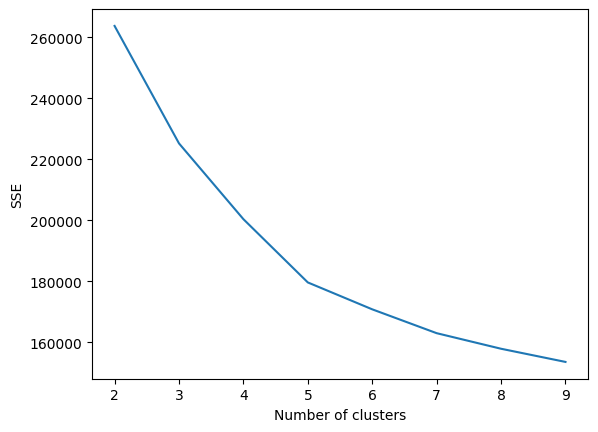

In [39]:
plt.plot(ks, sse[1:])
plt.xticks(ks)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

Text(0, 0.5, 'SSE')

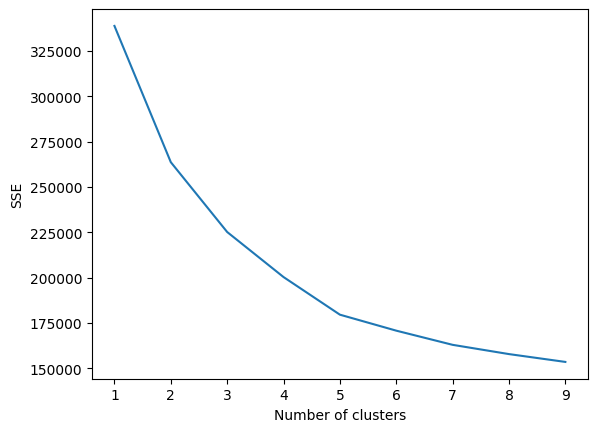

In [40]:
plt.plot([1] + ks, sse)
plt.xticks([1] + ks)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

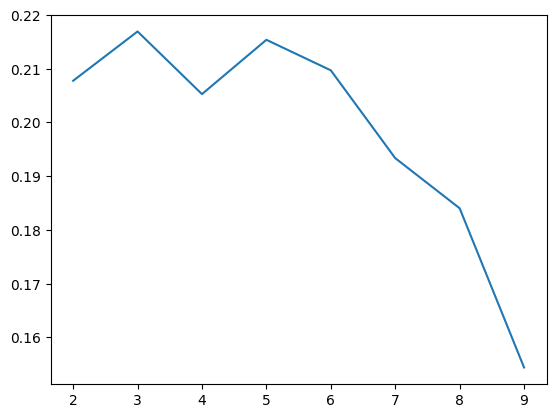

In [41]:
plt.plot(ks, silhouettes)

In [42]:
from sklearn.cluster import BisectingKMeans
bkmeans = BisectingKMeans(n_clusters=3,bisecting_strategy='largest_cluster')

In [43]:
bkmeans.fit(X)

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=3)

In [45]:
sse_ = []
silhouettes_ = []

# bkmeans = KMeans(n_clusters=1, n_init=10)
# bkmeans.fit(X)
# sse.append(kmeans.inertia_)

for k in ks:
    bkmeans = BisectingKMeans(n_clusters=k, bisecting_strategy='largest_cluster')
    bkmeans.fit(X)
    
    sse_.append(bkmeans.inertia_)
    silhouettes_.append(silhouette_score(X, bkmeans.labels_))


In [46]:
sse_

[263736.3895172816,
 225963.724439803,
 205753.51377109872,
 195136.06657452093,
 183793.58118853802,
 173635.791258208,
 170520.8984907663,
 160843.72753320914]

Text(0, 0.5, 'SSE')

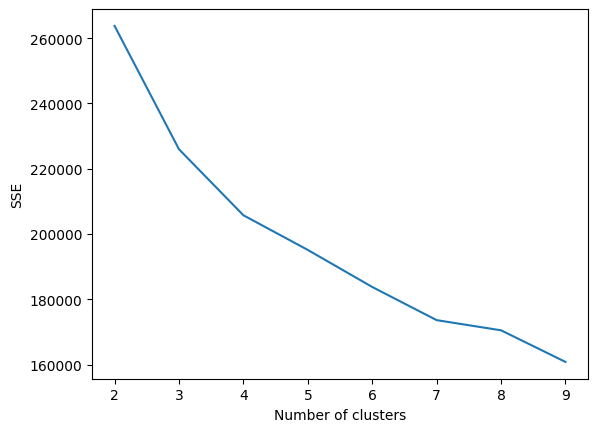

In [47]:
plt.plot(ks, sse_)
plt.xticks(ks)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

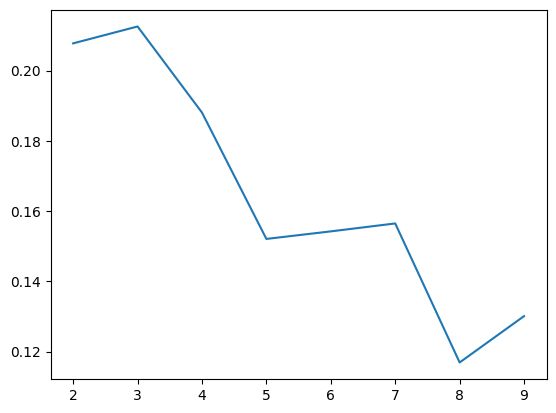

In [48]:
plt.plot(ks, silhouettes_)